In [0]:
!pwd

/content


In [0]:
!git clone https://github.com/Adishri-Gupta/query-video-summary.git

Cloning into 'query-video-summary'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 66 (delta 30), reused 43 (delta 17), pack-reused 0
Unpacking objects: 100% (66/66), done.


In [0]:
cd /content/query-video-summary/

/content/query-video-summary


In [0]:
!pip install -r requirements.txt

In [0]:
!python2 setup.py install --user

In [0]:
!pip install --upgrade https://github.com/Theano/Theano/archive/master.zip --user
!pip install --upgrade https://github.com/Lasagne/Lasagne/archive/master.zip --user

     - 23.3MB 118.4MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-TAeKzX/wheels/33/73/96/0ed263c62a86e2485ea634e0d3ae8169d50fd66e3b252541db
Successfully built Theano
  Found existing installation: Theano 1.0.4+unknown
    Uninstalling Theano-1.0.4+unknown:
      Successfully uninstalled Theano-1.0.4+unknown
  The scripts theano-cache and theano-nose are installed in '/root/.local/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


     \ 1.2MB 157.1MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-wks7_H/wheels/ca/4a/00/87f1777b229481fe76562df7c0cfb993bc88ed0cc37e3f0ed4
Successfully built Lasagne
  Found existing installation: Lasagne 0.2.dev1
    Uninstalling Lasagne-0.2.dev1:
      Successfully uninstalled Lasagne-0.2.dev1


In [0]:
import qvsumm

/usr/local/lib/python2.7/dist-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


Loaded config file from /root/.local/lib/python2.7/site-packages/qv_summary-0.1-py2.7.egg/qvsumm/config.ini


In [0]:
relscore_function = qvsumm.get_QAR_function()

Load weights and compile Relevance model...
Set LSTM learned weights...
Set CNN learned weights...


WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


In [0]:
w2vmodel = qvsumm.get_word2vec_function()

Load word2vec model...
INFO:gensim.models.word2vec:loading projection weights from ./data/word2vec/GoogleNews-vectors-negative300.bin
INFO:gensim.models.word2vec:loaded (3000000, 300) matrix from ./data/word2vec/GoogleNews-vectors-negative300.bin
INFO:gensim.models.word2vec:precomputing L2-norms of word weight vectors


In [0]:
videoURL="https://www.youtube.com/watch?v=oRdt9TndBVM"
query="underwater"

In [0]:
from qvsumm.utils_func import preprocess_video
imagenames= preprocess_video(query,videoURL)

In [0]:
relscores,intscores=qvsumm.get_rel_Q_scores(relscore_function, w2vmodel, query, imagenames)

Scoring frames... 


In [0]:
from qvsumm.shells import *
K=5 ### Number of elements in the summary
S1=qvsumm.shells.Summ(query,imagenames,relscores,intscores)
S1.budget=K
objectives=[quality_shell(S1),similarity_shell(S1),diversity_shell(S1),ex.representativeness_shell(S1)]
weights=[0.00963344,  0.45267703,  0.43680236,  0.10088718 ]
selected_elements,score,_=gm_submodular.lazy_greedy_maximize(S1,weights,objectives,budget=K,randomize=True)

In [0]:
print selected_elements

[120, 102, 38, 27, 63]


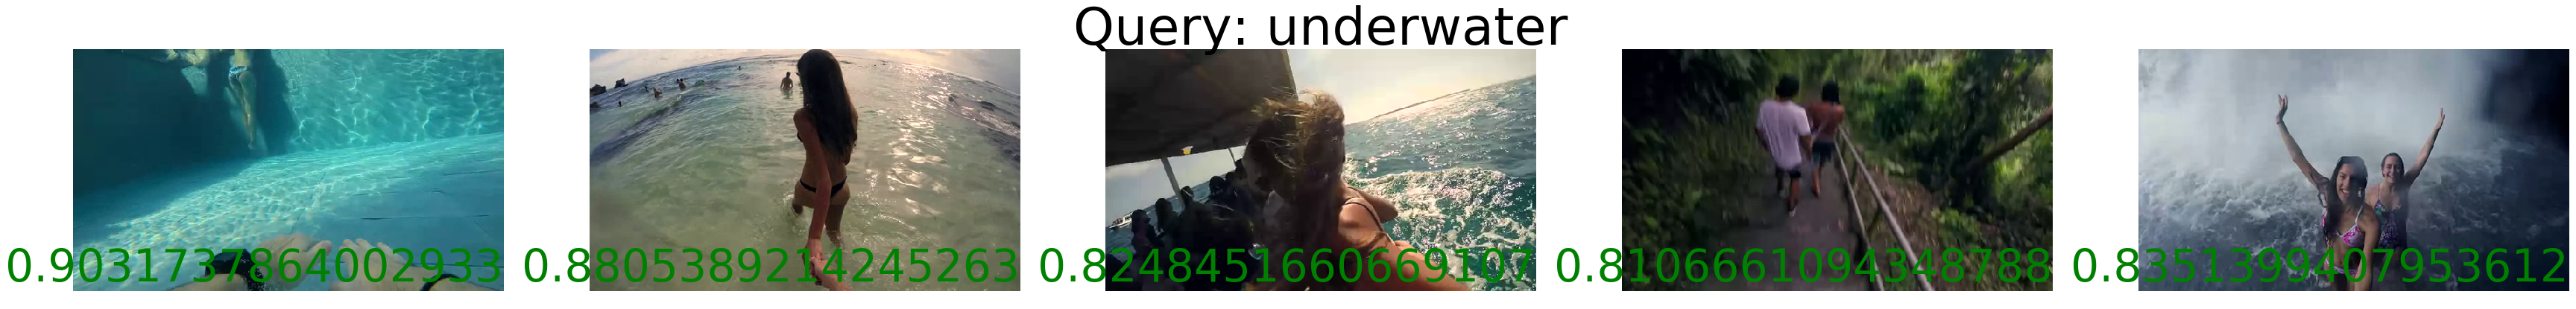

In [0]:
import matplotlib .pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
plt.figure(figsize=(60, 10))
for enum,i in enumerate(selected_elements[0:K]):
    if enum==3:
        plt.title("Query: "+str(query),fontsize=70)
    plt.subplot(1,K, enum+1);plt.imshow(mpimg.imread("videos/frames/"+str(i)+".png"));plt.axis('off')
    plt.annotate(str(relscores[i]), xy=(1, 0), xycoords='axes fraction', fontsize=60,
    horizontalalignment='right', verticalalignment='bottom',color='green')
plt.show()